In [1]:
import pandas as pd
import numpy as np
import re
import datetime
from scipy.stats import linregress, stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dog_rates_tweets.csv')

In [3]:
rating = data['text'].str.extract(r'(\d+(\.\d+)?)/10')

In [4]:
data['rating'] = rating[0].astype(float) # converts str to float

In [5]:
data['boolRating'] = rating[0].notnull() # returns column showing true/false if rating exists

In [6]:
data = data[data['boolRating'] == True] # filter out rows with no ratings

In [7]:
data = data[data['rating'] <= 25] #filter out outliers

In [8]:
data = data.drop(columns = ['boolRating']) # deletes boolRating column

In [9]:
def to_timestamp(timeString):
    return datetime.datetime.strptime(timeString, '%Y-%m-%d %H:%M:%S').timestamp()

In [10]:
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [11]:
def to_timestamp2(timeString):
    return datetime.datetime.strptime(timeString, '%Y-%m-%d %H:%M:%S')

In [12]:
data['created_at'] = data['created_at'].apply(to_timestamp2)

In [13]:
fit = stats.linregress(data['timestamp'], data['rating'])

In [14]:
data['prediction'] = data['timestamp']*fit.slope + fit.intercept

In [15]:
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,13.185711
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,13.181733
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,13.179557
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,13.167562
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,13.163752
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535081e+09,13.507284
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534982e+09,13.503802
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534836e+09,13.498656
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534376e+09,13.482486


In [16]:
fit.slope, fit.intercept

(3.5159111034194068e-08, -40.464805015444)

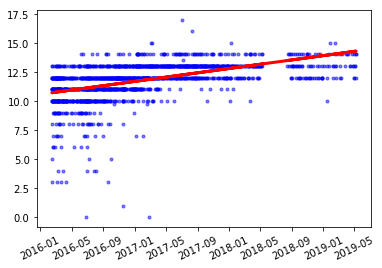

In [17]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()